In [129]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import pickle

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, f1_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score, roc_curve


In [4]:
file_path = r"C:/Users/jugal/OneDrive/Documents/Ironhack_project/Project_ML/heart.csv"
df = pd.read_csv(file_path)
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [6]:
df.shape

(918, 12)

In [8]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [10]:
df.isna().any()

Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool

In [12]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
913    False
914    False
915    False
916    False
917    False
Length: 918, dtype: bool

In [14]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [16]:
# Since we can only accept numeric values, we have to turn the categorical variables into numeric
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina','ST_Slope']
df_dummy = pd.get_dummies(df[categorical_cols], drop_first=False, dtype=int)
df_dummy


,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,0,1,0,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0,1,0,0,0,1,0,1,0,1,0,0,1,0
914,0,1,1,0,0,0,0,1,0,1,0,0,1,0
915,0,1,1,0,0,0,0,1,0,0,1,0,1,0
916,1,0,0,1,0,0,1,0,0,1,0,0,1,0


In [18]:
df.shape[0]

918

In [20]:
df_dummy.shape[0]

918

In [22]:
df.shape[0] == df_dummy.shape[0]

True

In [24]:
# Joining the data
transformed_df = pd.merge(
    df,
    df_dummy,
    left_index=True,
    right_index=True
 )

In [26]:
# Dropping the column that we transformed to numerical
transformed_df.drop(columns= ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina','ST_Slope'], inplace = True)
transformed_df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [28]:
# Performing Train Test Split
X_train, X_test, y_train, y_test = train_test_split(transformed_df.drop(columns=['HeartDisease']), transformed_df['HeartDisease'])

In [30]:
X_train.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
757,50,140,233,0,163,0.6,0,1,0,0,1,0,0,1,0,1,0,0,1,0
54,52,130,180,0,140,1.5,1,0,1,0,0,0,0,1,0,0,1,0,1,0
133,56,150,230,0,124,1.5,0,1,1,0,0,0,0,0,1,0,1,0,1,0
760,53,123,282,0,95,2.0,0,1,1,0,0,0,0,1,0,0,1,0,1,0
747,42,140,226,0,178,0.0,0,1,1,0,0,0,0,1,0,1,0,0,0,1


In [32]:
y_train.head()

757    1
54     0
133    1
760    1
747    0
Name: HeartDisease, dtype: int64

In [34]:
X_test.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
420,66,110,213,1,99,1.3,0,1,0,0,1,0,1,0,0,0,1,0,1,0
773,56,120,193,0,162,1.9,0,1,0,0,0,1,1,0,0,1,0,0,1,0
238,48,160,355,0,99,2.0,0,1,1,0,0,0,0,1,0,0,1,0,1,0
761,52,112,230,0,160,0.0,0,1,1,0,0,0,0,1,0,1,0,0,0,1
432,63,170,177,0,84,2.5,0,1,1,0,0,0,0,1,0,0,1,1,0,0


In [36]:
y_test.head()

420    0
773    0
238    1
761    1
432    1
Name: HeartDisease, dtype: int64

In [38]:
# Creating an instance of normalizer 
normalizer = MinMaxScaler()
normalizer.fit(X_train)

MinMaxScaler()

In [40]:
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [44]:
X_train_norm = pd.DataFrame(X_train_norm, columns=normalizer.feature_names_in_)
X_train_norm.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.437500,0.500000,0.413121,0.0,0.719424,0.363636,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.479167,0.416667,0.319149,0.0,0.553957,0.465909,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.562500,0.583333,0.407801,0.0,0.438849,0.465909,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.500000,0.358333,0.500000,0.0,0.230216,0.522727,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.270833,0.500000,0.400709,0.0,0.827338,0.295455,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [46]:
X_test_norm = pd.DataFrame(X_test_norm, columns=X_test.columns)
X_test_norm.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.770833,0.250000,0.377660,1.0,0.258993,0.443182,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.562500,0.333333,0.342199,0.0,0.712230,0.511364,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.395833,0.666667,0.629433,0.0,0.258993,0.522727,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.479167,0.266667,0.407801,0.0,0.697842,0.295455,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.708333,0.750000,0.313830,0.0,0.151079,0.579545,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


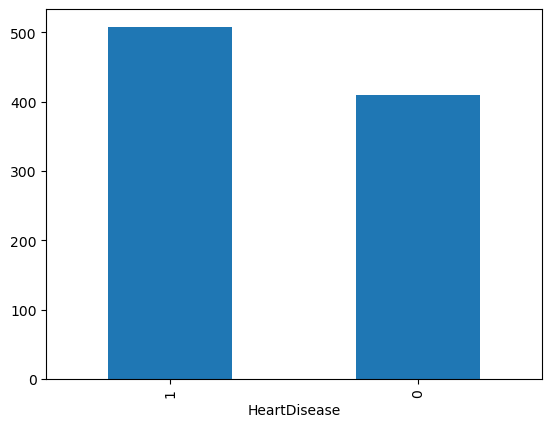

In [48]:
# Checking Data distribution 
number_of_heartdisease = transformed_df['HeartDisease'].value_counts()
number_of_heartdisease.plot(kind='bar')
plt.show()

In [52]:
sm = SMOTE (random_state=1, sampling_strategy=1.0)

In [56]:
X_train_sm, y_train_sm = sm.fit_resample(X_train_norm, y_train)

In [58]:
# Training our model to check the improvements
log_reg = LogisticRegression(max_iter=100)
log_reg.fit(X_train_sm, y_train_sm)

LogisticRegression()

In [62]:
# Evaluating the model
pred = log_reg.predict(X_test_norm)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84       103
           1       0.89      0.83      0.86       127

    accuracy                           0.85       230
   macro avg       0.85      0.85      0.85       230
weighted avg       0.85      0.85      0.85       230



In [64]:
rf = RandomForestClassifier(n_estimators= 100, max_depth = 20)

In [66]:
# Training a model
rf.fit(X_train_sm, y_train_sm)

RandomForestClassifier(max_depth=20)

In [68]:
# Evaluating the model

pred = rf.predict(X_test_norm)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       103
           1       0.87      0.86      0.86       127

    accuracy                           0.85       230
   macro avg       0.85      0.85      0.85       230
weighted avg       0.85      0.85      0.85       230



In [70]:
gb_cls = GradientBoostingClassifier(max_depth=20, n_estimators=100)

In [72]:
# Training the model
gb_cls.fit(X_train_sm, y_train_sm)

GradientBoostingClassifier(max_depth=20)

In [74]:
# Evaluating the model

pred = gb_cls.predict(X_test_norm)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       103
           1       0.85      0.83      0.84       127

    accuracy                           0.82       230
   macro avg       0.82      0.82      0.82       230
weighted avg       0.82      0.82      0.82       230



Applying SMOTE on scaled data

In [77]:
# Creating an instance of scaler 
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [79]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [81]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=scaler.feature_names_in_)
X_train_scaled.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-0.364728,0.424303,0.332129,-0.554964,1.046765,-0.281760,-0.514496,0.514496,-1.084995,-0.487247,1.918404,-0.238402,-0.487247,0.789076,-0.487247,0.838433,-0.838433,-0.276916,0.979854,-0.848528
1,-0.152970,-0.128577,-0.153681,-0.554964,0.146889,0.557825,1.943651,-1.943651,0.921663,-0.487247,-0.521267,-0.238402,-0.487247,0.789076,-0.487247,-1.192701,1.192701,-0.276916,0.979854,-0.848528
2,0.270545,0.977182,0.304630,-0.554964,-0.479111,0.557825,-0.514496,0.514496,0.921663,-0.487247,-0.521267,-0.238402,-0.487247,-1.267304,2.052345,-1.192701,1.192701,-0.276916,0.979854,-0.848528
3,-0.047091,-0.515592,0.781273,-0.554964,-1.613737,1.024261,-0.514496,0.514496,0.921663,-0.487247,-0.521267,-0.238402,-0.487247,0.789076,-0.487247,-1.192701,1.192701,-0.276916,0.979854,-0.848528
4,-1.211759,0.424303,0.267965,-0.554964,1.633641,-0.841483,-0.514496,0.514496,0.921663,-0.487247,-0.521267,-0.238402,-0.487247,0.789076,-0.487247,0.838433,-0.838433,-0.276916,-1.020560,1.178511


In [83]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_test_scaled.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,1.311376,-1.147816,0.073943,1.850156,-1.577876,0.436152,-0.520306,0.520306,-1.081578,-0.465759,1.762709,-0.201802,1.762709,-1.120224,-0.5,-1.282060,1.282060,-0.254588,1.053609,-0.932694
1,0.244462,-0.640128,-0.108241,-0.540495,0.939014,1.009380,-0.520306,0.520306,-1.081578,-0.465759,-0.567309,4.955356,1.762709,-1.120224,-0.5,0.779995,-0.779995,-0.254588,1.053609,-0.932694
2,-0.609069,1.390623,1.367443,-0.540495,-1.577876,1.104918,-0.520306,0.520306,0.924575,-0.465759,-0.567309,-0.201802,-0.567309,0.892679,-0.5,-1.282060,1.282060,-0.254588,1.053609,-0.932694
3,-0.182303,-1.046279,0.228798,-0.540495,0.859112,-0.805843,-0.520306,0.520306,0.924575,-0.465759,-0.567309,-0.201802,-0.567309,0.892679,-0.5,0.779995,-0.779995,-0.254588,-0.949119,1.072163
4,0.991302,1.898311,-0.253987,-0.540495,-2.177136,1.582609,-0.520306,0.520306,0.924575,-0.465759,-0.567309,-0.201802,-0.567309,0.892679,-0.5,-1.282060,1.282060,3.927922,-0.949119,-0.932694


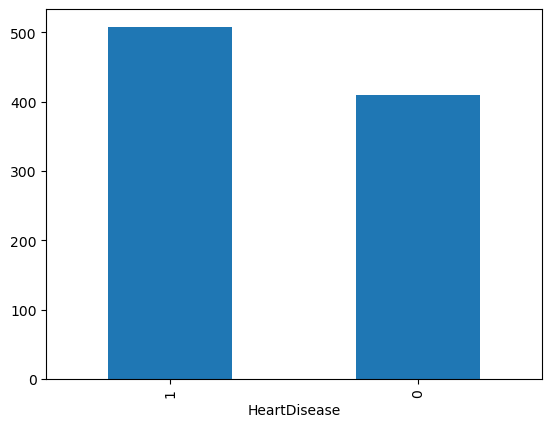

In [85]:
# Checking Data distribution 
number_of_heartdisease = transformed_df['HeartDisease'].value_counts()
number_of_heartdisease.plot(kind='bar')
plt.show()

In [97]:
sm = SMOTE(random_state = 1, sampling_strategy = 1.0)

In [107]:
X_train_sm, y_train_sm = sm.fit_resample(X_train_scaled, y_train)

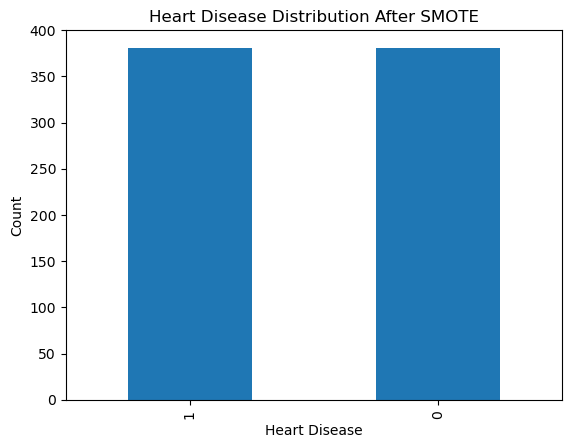

In [111]:
# Checking Data distribution 
number_of_heartdisease = pd.Series(y_train_sm).value_counts()
number_of_heartdisease.plot(kind='bar')
plt.title('Heart Disease Distribution After SMOTE')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

In [113]:
# Logistic Regression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=1000)

In [115]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       103
           1       0.88      0.84      0.86       127

    accuracy                           0.85       230
   macro avg       0.85      0.85      0.85       230
weighted avg       0.85      0.85      0.85       230



In [117]:
# Random forest
rf = RandomForestClassifier(n_estimators= 100, max_depth = 20)

In [121]:
# Training a model
rf.fit(X_train_sm, y_train_sm)

RandomForestClassifier(max_depth=20)

In [123]:
# Evaluating the model

pred = rf.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       103
           1       0.87      0.86      0.86       127

    accuracy                           0.85       230
   macro avg       0.85      0.85      0.85       230
weighted avg       0.85      0.85      0.85       230



In [125]:
# Gradient Boosting
gb_cls = GradientBoostingClassifier(max_depth=20, n_estimators=100)

# Training the model
gb_cls.fit(X_train_sm, y_train_sm)


GradientBoostingClassifier(max_depth=20)

In [127]:
# Evaluating the model

pred = gb_cls.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       103
           1       0.83      0.80      0.81       127

    accuracy                           0.80       230
   macro avg       0.79      0.80      0.79       230
weighted avg       0.80      0.80      0.80       230



In [135]:
roc_auc = roc_auc_score(y_test, pred)
print(roc_auc)


0.795696047702775
